# 畳み込み演算

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from common.util import im2col

## 簡単なデータで畳み込みをやってみる

### 入力データをつくる

In [2]:
img = np.array([[[[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]]]])
img

array([[[[1, 2, 3, 0],
         [0, 1, 2, 3],
         [3, 0, 1, 2],
         [2, 3, 0, 1]]]])

### 畳み込み演算用に配列を変形する

In [3]:
col = im2col(img,3,3,stride=1,pad=0) # im2col関数については後ほど実装する
print(col.shape)
col

(4, 9)


array([[1., 2., 3., 0., 1., 2., 3., 0., 1.],
       [2., 3., 0., 1., 2., 3., 0., 1., 2.],
       [0., 1., 2., 3., 0., 1., 2., 3., 0.],
       [1., 2., 3., 0., 1., 2., 3., 0., 1.]])

### フィルターをつくる

In [4]:
flt = np.array([[2,0,1],[0,1,2],[1,0,2]])
flt

array([[2, 0, 1],
       [0, 1, 2],
       [1, 0, 2]])

### 畳み込み演算用に配列を1次元配列に変形する

In [5]:
flt = flt.reshape(-1)
flt

array([2, 0, 1, 0, 1, 2, 1, 0, 2])

### 畳み込む

In [6]:
img_y =  np.dot(col,flt)
img_y.reshape(2,2)

array([[15., 16.],
       [ 6., 15.]])

## MINIST画像で畳み込みをやってみる

In [7]:
# Load the MNIST dataset
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

train = X_train/255
test = X_test/255
train = train.reshape(-1, 28*28)
test = test.reshape(-1, 28*28)
train_labels = lb.fit_transform(y_train)


def show_image(img): 
    pil_img = Image.fromarray(img)
    plt.imshow(pil_img)
    plt.gray()
    plt.show()
    return

### trainの1枚目を取り出す

label=[0 0 0 0 0 1 0 0 0 0]


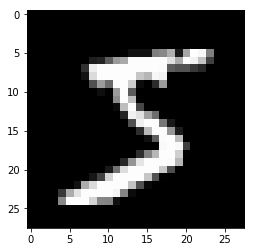

In [8]:
label = train_labels[0]
img = train[0]
print("label=%s"%label)
img = img.reshape(28,28)
img = img*255
show_image(img)

### 畳み込み演算用に配列を変換する

In [9]:
img = img.reshape(1,1,28,28)
col = im2col(img,3,3,stride=1,pad=0)
print(col.shape)
col

(676, 9)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### フィルターをつくる

In [10]:
flt_mean = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])#平均化フィルター
print(flt_mean.sum())
flt_mean

1.0


array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

### 畳み込み演算用に配列を変換する

In [11]:
flt_mean = flt_mean.reshape(-1)
flt_mean

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

### 畳み込む

In [12]:
img_y= np.dot(col,flt_mean)
img_y = img_y.reshape(26,26)
img_y

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00

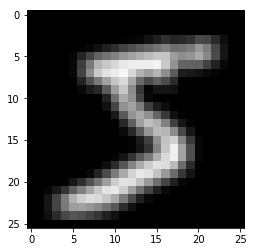

In [13]:
show_image(img_y)

## いろんなフィルターを試してみる

### 垂直方向を強調するフィルター

In [14]:
flt_dv = np.array([[0,0,0],[0,1,-1],[0,0,0]])
print(flt_dv.sum())
flt_dv

0


array([[ 0,  0,  0],
       [ 0,  1, -1],
       [ 0,  0,  0]])

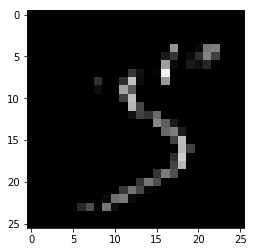

In [15]:
flt_dv = flt_dv.reshape(-1)
img_y= np.dot(col,flt_dv)
img_y = img_y.reshape(26,26)
show_image(img_y)

### 水平方向を強調するフィルター

In [16]:
flt_dh = np.array([[0,0,0],[0,1,0],[0,-1,0]])
print(flt_dh.sum())
flt_dh

0


array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, -1,  0]])

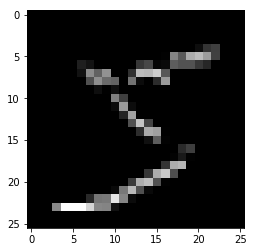

In [17]:
img_y= np.dot(col, flt_dh.reshape(-1))
img_y = img_y.reshape(26,26)
show_image(img_y)

## 他の写真で畳み込みを試してみる

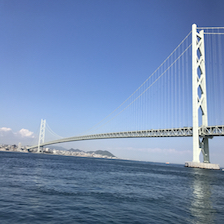

In [18]:
img_ = Image.open("../1_data/original/bridge.jpg")
img_

In [19]:
img_ =  np.asarray(img_)
print("次元:",img_.shape)
img_

次元: (224, 224, 3)


array([[[ 88, 117, 175],
        [ 89, 118, 178],
        [ 92, 118, 177],
        ...,
        [ 63,  85, 135],
        [ 62,  84, 134],
        [ 63,  85, 135]],

       [[ 92, 116, 176],
        [ 92, 118, 177],
        [ 91, 117, 178],
        ...,
        [ 63,  85, 135],
        [ 63,  85, 135],
        [ 64,  86, 136]],

       [[ 92, 116, 178],
        [ 91, 117, 176],
        [ 91, 117, 176],
        ...,
        [ 64,  86, 133],
        [ 63,  85, 135],
        [ 63,  84, 137]],

       ...,

       [[ 75,  93, 115],
        [ 73,  91, 115],
        [ 65,  86, 107],
        ...,
        [ 69,  86, 106],
        [ 65,  84, 101],
        [ 64,  85, 104]],

       [[ 62,  80, 104],
        [ 64,  82, 106],
        [ 67,  88, 109],
        ...,
        [ 63,  82,  97],
        [ 64,  83, 100],
        [ 61,  78,  96]],

       [[ 58,  78, 102],
        [ 64,  84, 108],
        [ 71,  92, 113],
        ...,
        [ 64,  81,  99],
        [ 62,  79,  97],
        [ 61,  78,  96]]

In [20]:
img_ = img_.transpose(2,0,1)
print("次元:",img_.shape)
img_

次元: (3, 224, 224)


array([[[ 88,  89,  92, ...,  63,  62,  63],
        [ 92,  92,  91, ...,  63,  63,  64],
        [ 92,  91,  91, ...,  64,  63,  63],
        ...,
        [ 75,  73,  65, ...,  69,  65,  64],
        [ 62,  64,  67, ...,  63,  64,  61],
        [ 58,  64,  71, ...,  64,  62,  61]],

       [[117, 118, 118, ...,  85,  84,  85],
        [116, 118, 117, ...,  85,  85,  86],
        [116, 117, 117, ...,  86,  85,  84],
        ...,
        [ 93,  91,  86, ...,  86,  84,  85],
        [ 80,  82,  88, ...,  82,  83,  78],
        [ 78,  84,  92, ...,  81,  79,  78]],

       [[175, 178, 177, ..., 135, 134, 135],
        [176, 177, 178, ..., 135, 135, 136],
        [178, 176, 176, ..., 133, 135, 137],
        ...,
        [115, 115, 107, ..., 106, 101, 104],
        [104, 106, 109, ...,  97, 100,  96],
        [102, 108, 113, ...,  99,  97,  96]]], dtype=uint8)

### 畳み込み用に配列を変換する

In [21]:
col_ = im2col(img_.reshape(1,3,224,224),3,3,stride=1,pad=0)
print(col_.shape)
col_

(49284, 27)


array([[ 88.,  89.,  92., ..., 178., 176., 176.],
       [ 89.,  92.,  91., ..., 176., 176., 177.],
       [ 92.,  91.,  90., ..., 176., 177., 175.],
       ...,
       [ 71.,  72.,  69., ..., 101.,  95.,  99.],
       [ 72.,  69.,  65., ...,  95.,  99.,  97.],
       [ 69.,  65.,  64., ...,  99.,  97.,  96.]])

### 畳み込む

垂直方向を強調するフィルター


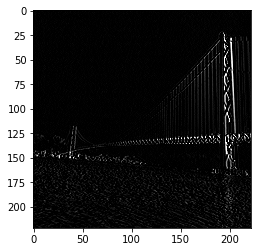

水平方向を強調するフィルター


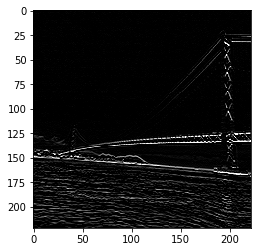

In [22]:
print("垂直方向を強調するフィルター")
flt_dh_3 = np.array([flt_dv,flt_dv,flt_dv])
img_y= np.dot(col_,flt_dh_3.reshape(-1))
img_y = img_y.reshape(222,222)
show_image(img_y)

print("水平方向を強調するフィルター")
flt_dh_3 = np.array([flt_dh,flt_dh,flt_dh])
img_y= np.dot(col_,flt_dh_3.reshape(-1))
img_y = img_y.reshape(222,222)
show_image(img_y)


### [演習]
- 自分が持っている写真で畳み込み演算を試してみましょう。